<a href="https://colab.research.google.com/github/e-jungs2/e-jungs2/blob/main/5%EA%B8%B0_%EB%84%88%EB%8B%A4%EB%82%98%EB%B9%84_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Surived:0=사망, 1=생존
- Pclass: 1=1등석, 2=2등석, 3=3등석
- gender:male=남성, female=여성
- Age: 나이
- SibSp: 타이타닉 호에 동승한 자매/배우자의 수
- Parch: 타이타닉 호에 동승한 부모/자식의 수
- Ticket: 티켓 번호
- Fare: 승객 요금
- Cabin: 방 호수
- Embarked: 탑승지; C=셰르부르, Q=퀴즈타운, S=사우샘프턴

In [534]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [535]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [536]:
train_df = pd.read_csv('/content/drive/MyDrive/다트비/0차시.타이타닉/titanic/asset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/다트비/0차시.타이타닉/titanic/asset/test.csv')

In [537]:
plt.style.use('fivethirtyeight')
plt.ion()

import warnings
warnings.filterwarnings('ignore')

In [538]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [539]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [540]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


age 결측치 177
cabin 결측치 687
embarked 결측치 2

In [541]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


age 결측치 86
cabin 결측치 327
fare 결측치 1

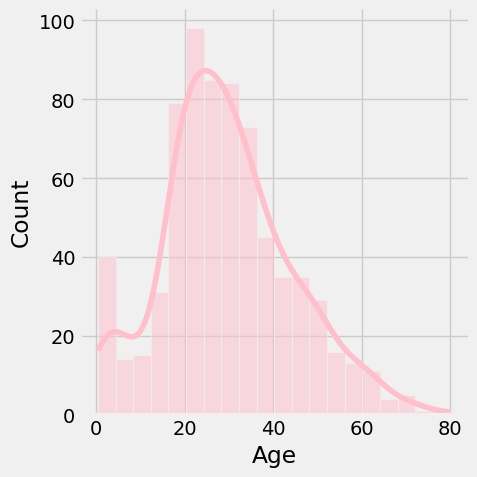

In [542]:
sns.displot(train_df['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

In [543]:
# 1. Age 보간 (Pclass & Sex 기준 중앙값 사용)
for df in [train_df, test_df]:
    age_median = df.groupby(['Pclass', 'Sex'])['Age'].transform('median')
    df['Age'] = df['Age'].fillna(age_median)

# 2. Cabin 보간 (첫 알파벳 추출, 결측치는 'U'로 대체)
for df in [train_df, test_df]:
    df['Cabin'] = df['Cabin'].fillna('U')
    df['Cabin_First_Letter'] = df['Cabin'].apply(lambda x: x[0])

# 3. Embarked 보간 (최빈값 'S'로 대체)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [544]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [545]:
for df in [train_df, test_df]:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

test_df['Fare'] = test_df.groupby(['Pclass', 'FamilySize'])['Fare'].transform(lambda x: x.fillna(x.median()))

In [546]:
test_df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [547]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_First_Letter,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,U,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S,U,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,B,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,U,S,U,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,C,1


In [548]:
train_df_cleaned = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_df_cleaned = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

train_df_cleaned = pd.get_dummies(train_df_cleaned, columns=['Sex'], drop_first=True)
test_df_cleaned = pd.get_dummies(test_df_cleaned, columns=['Sex'], drop_first=True)

from sklearn.preprocessing import LabelEncoder

cabin_encoder = LabelEncoder()
train_df_cleaned['Cabin_First_Letter'] = cabin_encoder.fit_transform(train_df_cleaned['Cabin_First_Letter'])
test_df_cleaned['Cabin_First_Letter'] = cabin_encoder.transform(test_df_cleaned['Cabin_First_Letter'])

train_df_cleaned['Embarked'] = train_df_cleaned['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

In [549]:
train_df_cleaned

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Cabin_First_Letter,FamilySize,Sex_male
0,0,3,22.0,1,0,7.2500,2,8,2,True
1,1,1,38.0,1,0,71.2833,1,2,2,False
2,1,3,26.0,0,0,7.9250,2,8,1,False
3,1,1,35.0,1,0,53.1000,2,2,2,False
4,0,3,35.0,0,0,8.0500,2,8,1,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,2,8,1,True
887,1,1,19.0,0,0,30.0000,2,1,1,False
888,0,3,21.5,1,2,23.4500,2,8,4,False
889,1,1,26.0,0,0,30.0000,1,2,1,True


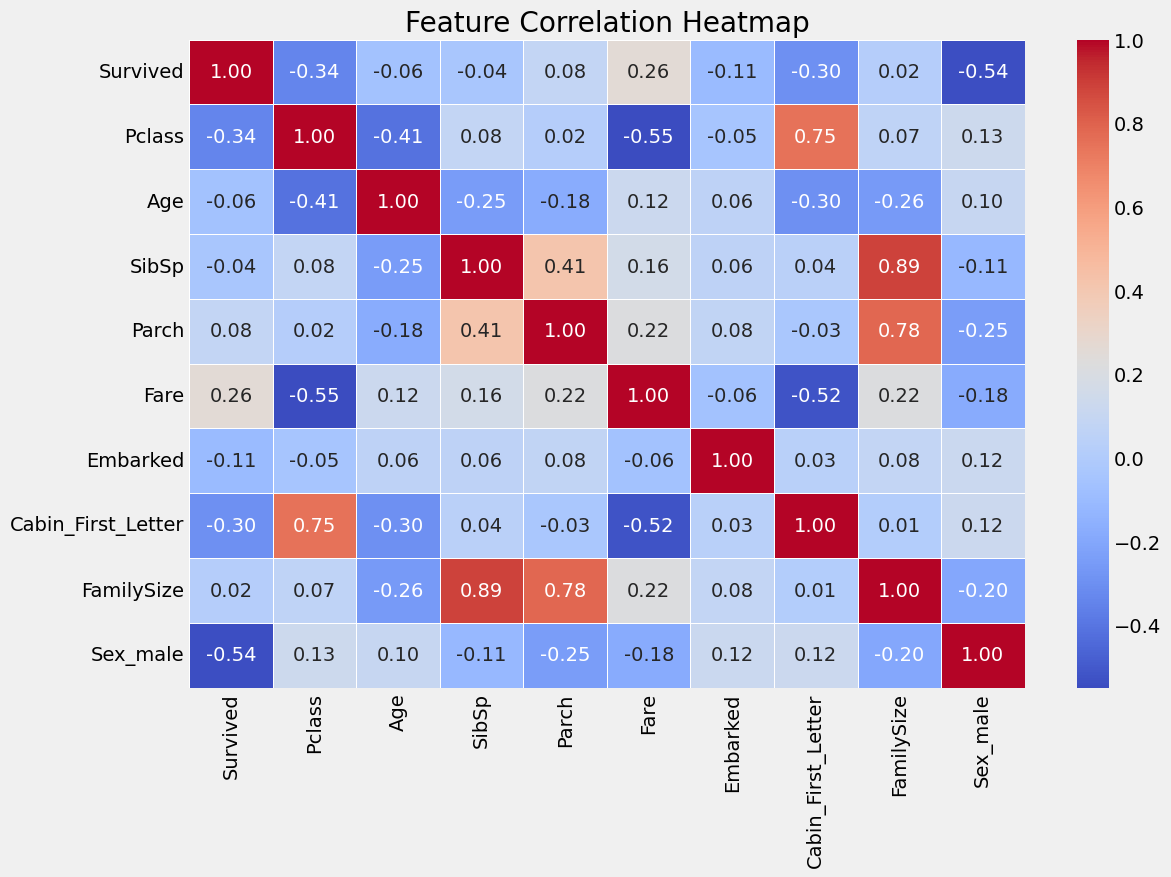

Survived              1.000000
Fare                  0.257307
Parch                 0.081629
FamilySize            0.016639
SibSp                -0.035322
Age                  -0.059579
Embarked             -0.106811
Cabin_First_Letter   -0.301116
Pclass               -0.338481
Sex_male             -0.543351
Name: Survived, dtype: float64


In [550]:
import matplotlib.pyplot as plt

corr_matrix = train_df_cleaned.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

correlation_with_target = corr_matrix["Survived"].sort_values(ascending=False)
print(correlation_with_target)

Family size와 SibSp, Parch
Cabin_First_letter와 Pclass
#다중공선성 확인

In [551]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train_df_cleaned[['FamilySize', 'SibSp']]

# 상수항 추가 (VIF 계산을 위해)
X = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,4.008929
1,FamilySize,4.839505
2,SibSp,4.839505


In [552]:
X = train_df_cleaned[['FamilySize', 'Parch']]

# 상수항 추가 (VIF 계산을 위해)
X = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,2.921581
1,FamilySize,2.585733
2,Parch,2.585733


In [553]:
X = train_df_cleaned[['Cabin_First_Letter', 'Pclass']]

# 상수항 추가 (VIF 계산을 위해)
X = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,9.641687
1,Cabin_First_Letter,2.259555
2,Pclass,2.259555


In [554]:
X = train_df_cleaned[['Fare', 'Pclass']]

# 상수항 추가 (VIF 계산을 위해)
X = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,15.358041
1,Fare,1.432562
2,Pclass,1.432562


# EDA

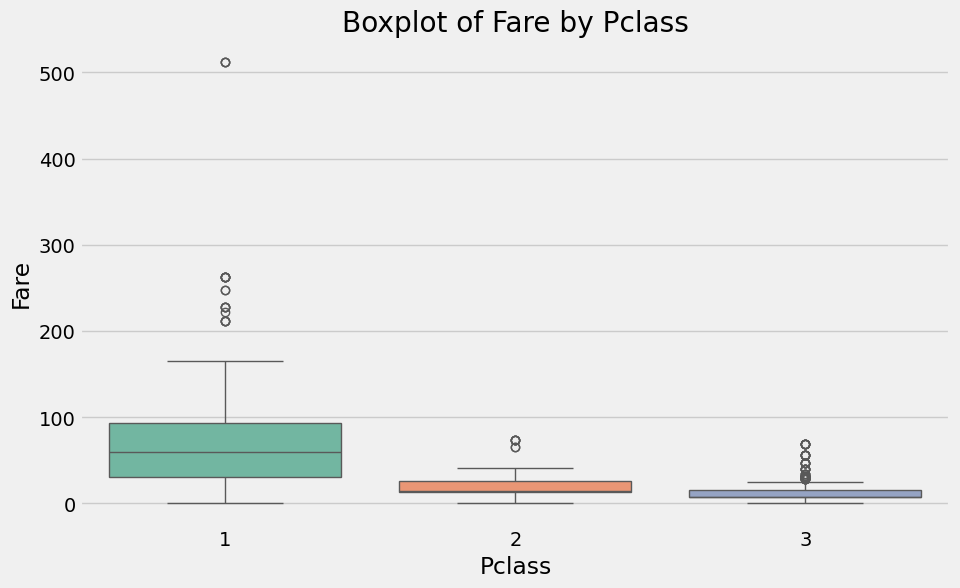

In [555]:
X = train_df[['Fare', 'Pclass']]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=X, palette='Set2')
plt.title('Boxplot of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

500넘는 이상치 drop

In [556]:
train_df = train_df[train_df['Fare'] <= 500]
test_df = train_df[train_df['Fare'] <= 500]

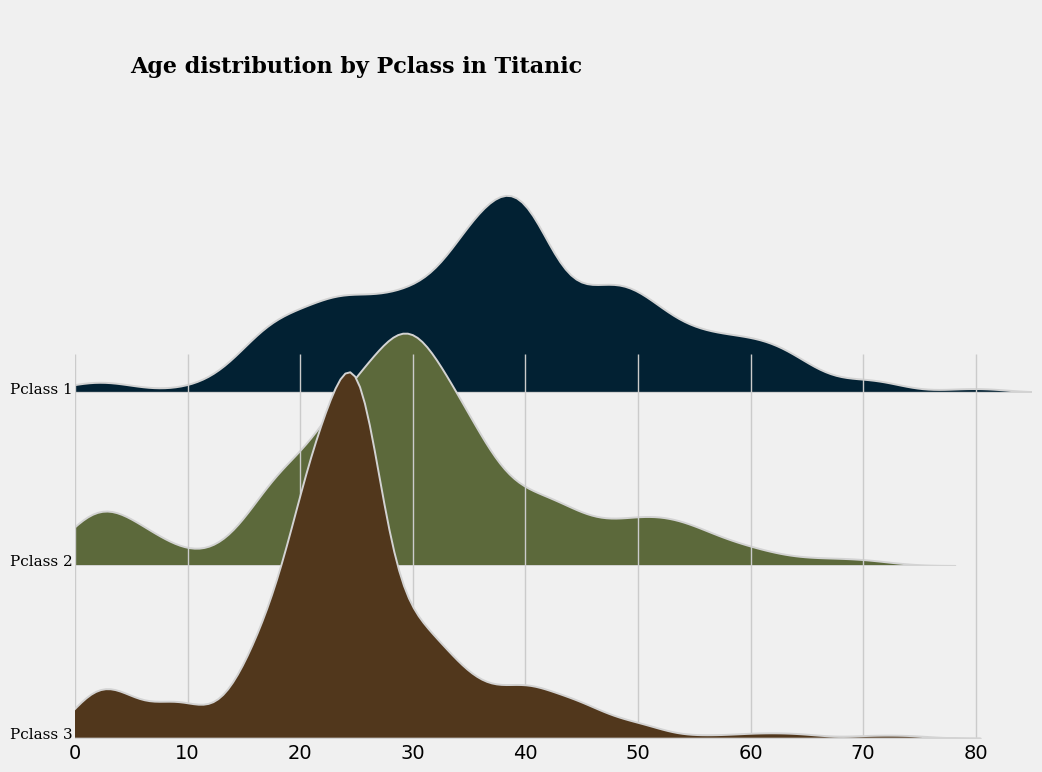

In [557]:
fig = plt.figure(figsize=(11, 9))
gs = fig.add_gridspec(3, 1)
gs.update(hspace=-0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(train_df['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    sns.kdeplot(x='Age', data=train_df[train_df['Pclass'] == cls],
                fill=True, ax=axes[idx], cut=3, bw_method=0.2,
                lw=1.4, edgecolor='lightgray', color=c, alpha=1)

    axes[idx].set_ylim(0, 0.07)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2: axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top", "right", "left", "bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2, 0, f'Pclass {cls}', fontweight="light", fontfamily='serif', fontsize=11, ha="right")

fig.text(0.13, 0.81, "Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)
fig.tight_layout()


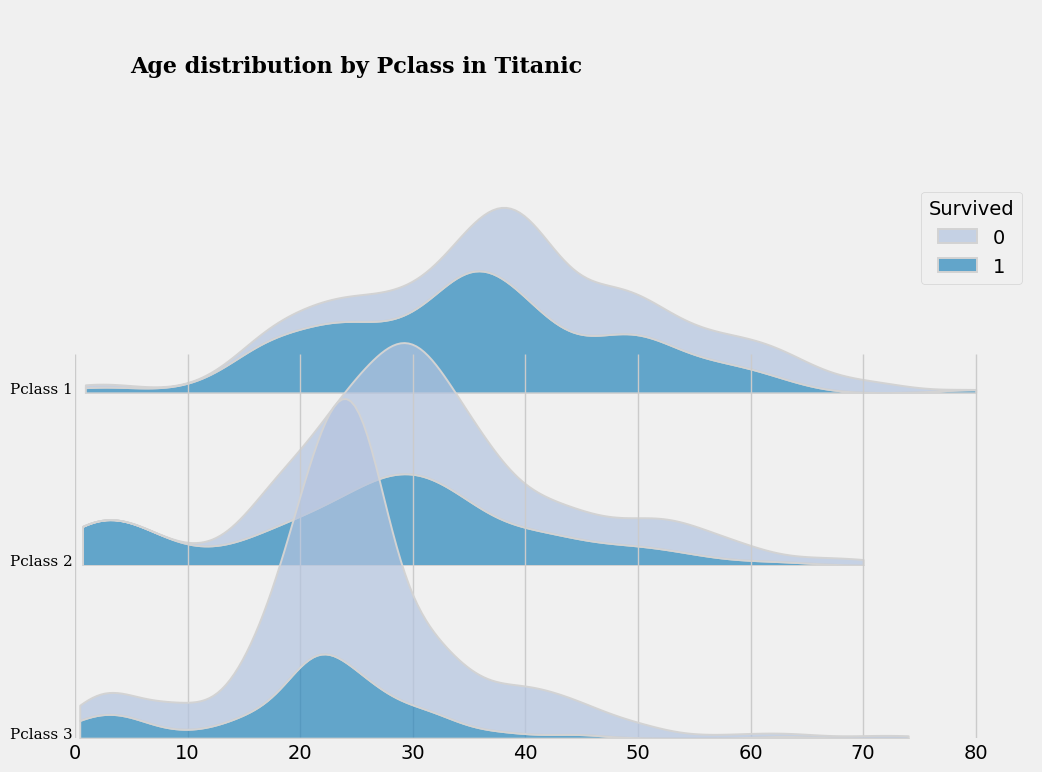

In [558]:
fig = plt.figure(figsize=(11,9))
gs = fig.add_gridspec(3, 1)
gs.update(hspace=-0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(train_df['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))

    sns.kdeplot(x='Age', data=train_df[train_df['Pclass'] == cls],
                fill=True, ax=axes[idx], cut=0, bw_method=0.25,
                lw=1.4, edgecolor='lightgray', hue='Survived',
                multiple="stack", palette='PuBu', alpha=0.7
               )

    axes[idx].set_ylim(0, 0.07)
    axes[idx].set_xlim(0, 85)

    axes[idx].set_yticks([])
    if idx != 2: axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')

    spines = ["top", "right", "left", "bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)

    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2, 0, f'Pclass {cls}', fontweight="light", fontfamily='serif', fontsize=11, ha="right")
    if idx != 1: axes[idx].get_legend().remove()

fig.text(0.13, 0.81, "Age distribution by Pclass in Titanic", fontweight="bold", fontfamily='serif', fontsize=16)

plt.show()

PClass는 유의해보이므로, 검정해도 좋아보입니다. (클래스가 높아질수록 살아남을 확률이 높아 보임.)

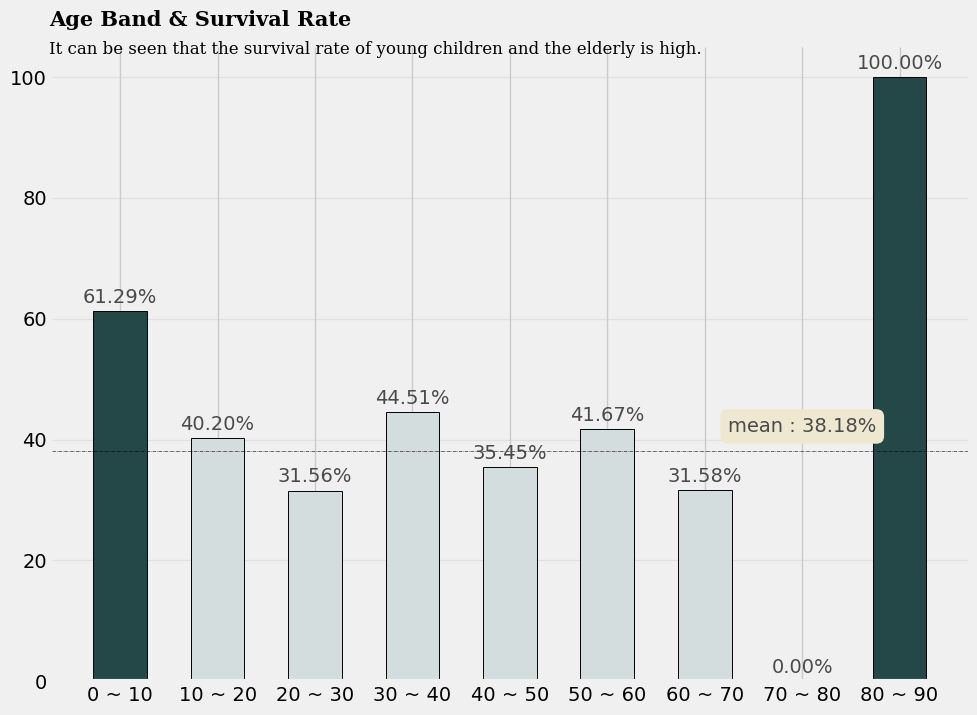

In [559]:
import numpy as np

def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

train_df['age_band'] = train_df['Age'].apply(age_band)
titanic_age = train_df[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747'

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'],
       color=color_map, width=0.55,
       edgecolor='black',
       linewidth=0.7)

for s in ["top", "right", "left"]:
    ax.spines[s].set_visible(False)

# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%",
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va='center', ha='center', fontweight='light',
                   color='#4a4a4a')

# mean line + annotation
mean = train_df['Survived'].mean() * 100
ax.axhline(mean, color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%",
            xy=('70 ~ 80', mean + 4),
            va='center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))

# Title & Subtitle
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children and the elderly is high.', fontsize=12, fontweight='light', fontfamily='serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()


나이 또한 유의해보이므로, 검정해도 좋아보임.

# Cabin 보간

In [560]:
train_df['Survived'].value_counts()

,count
Survived,
0,549
1,339


In [561]:
#from sklearn.impute import KNNImputer

# 1. Embarked_S, Embarked_C, Embarked_Q에 서열 부여
#train_df_cleaned['Embarked_S_Label'] = train_df_cleaned['Embarked_S'] * 2
#train_df_cleaned['Embarked_C_Label'] = train_df_cleaned['Embarked_C'] * 1
#train_df_cleaned['Embarked_Q_Label'] = train_df_cleaned['Embarked_Q'] * 0

# 2. 'u' (unknown) 값을 NaN으로 변경
#train_df_cleaned['Cabin_First_Letter'] = train_df_cleaned['Cabin_First_Letter'].replace('U', np.nan)

# 3. train_df_cleaned에서 Cabin_First_Letter 열을 제외한 나머지 열로 KNN 보간을 실행
#train_df2 = train_df_cleaned.copy()

# KNNImputer 초기화 (n_neighbors=5는 이웃 5개를 기준으로 보간)
#knn_imputer = KNNImputer(n_neighbors=10)

# 4. KNN 보간 적용 (Cabin_First_Letter 열을 보간)
#train_df2['Cabin_First_Letter'] = knn_imputer.fit_transform(
    #train_df_cleaned.drop(columns=['Cabin_First_Letter'])  # Cabin_First_Letter 제외
#)

# 5. 결과 출력 (train_df2에는 'Cabin_First_Letter' 열이 보간된 값으로 채워짐)
#train_df2.head()

In [562]:
# 1. 수치형 값(0, 1, 2)을 문자형으로 변환하는 매핑 딕셔너리 만들기
#letter_mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'T'}

# 2. 수치형 보간 결과를 문자형 값으로 변환
#train_df2['Cabin_First_Letter'] = train_df2['Cabin_First_Letter'].map(letter_mapping)

# 3. 결과 출력 (수치형 -> 문자형 변환 완료)
#train_df2.head()

In [563]:
#train_df2.isnull().sum()

In [564]:
#import numpy as np

# 1. 'u' 값을 NaN으로 변경
#train_df['Cabin_First_Letter'] = train_df['Cabin_First_Letter'].replace('U', np.nan)

# 2. train_df2에서 보간된 'Cabin_First_Letter' 값을 가져와서 train_df에 반영
#train_df['Cabin_First_Letter'] = train_df['Cabin_First_Letter'].fillna(train_df2['Cabin_First_Letter'])

# 3. 결과 확인
#train_df.head()

In [565]:
#train_df['Cabin_First_Letter'].value_counts()

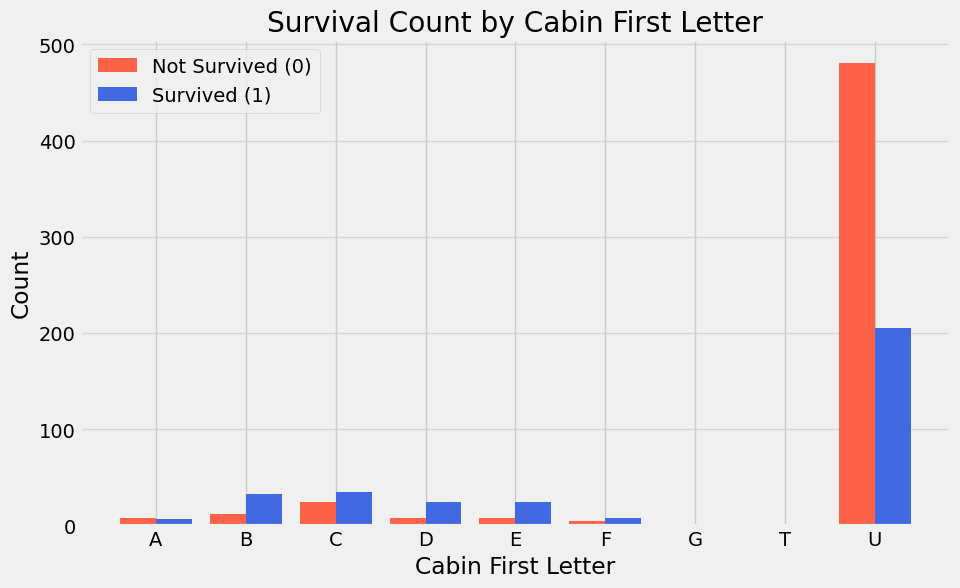

In [566]:
# Survived 컬럼 기준으로 Cabin_first_letter의 빈도 계산
survival_counts = train_df.groupby(['Cabin_First_Letter', 'Survived']).size().unstack()

# X축 위치 설정
x = np.arange(len(survival_counts.index))  # Cabin_first_letter의 개수만큼 x축 생성
width = 0.4  # 막대 너비 조정

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, survival_counts[0], width, label='Not Survived (0)', color='tomato')
ax.bar(x + width/2, survival_counts[1], width, label='Survived (1)', color='royalblue')

# X축 및 그래프 설정
ax.set_xlabel("Cabin First Letter")
ax.set_ylabel("Count")
ax.set_title("Survival Count by Cabin First Letter")
ax.set_xticks(x)
ax.set_xticklabels(survival_counts.index)  # X축 레이블을 Cabin_first_letter로 설정
ax.legend()
ax.grid(axis='y', linestyle='-', alpha=0.7)

# 그래프 출력
plt.show()

Text(0, 0.5, 'Count')

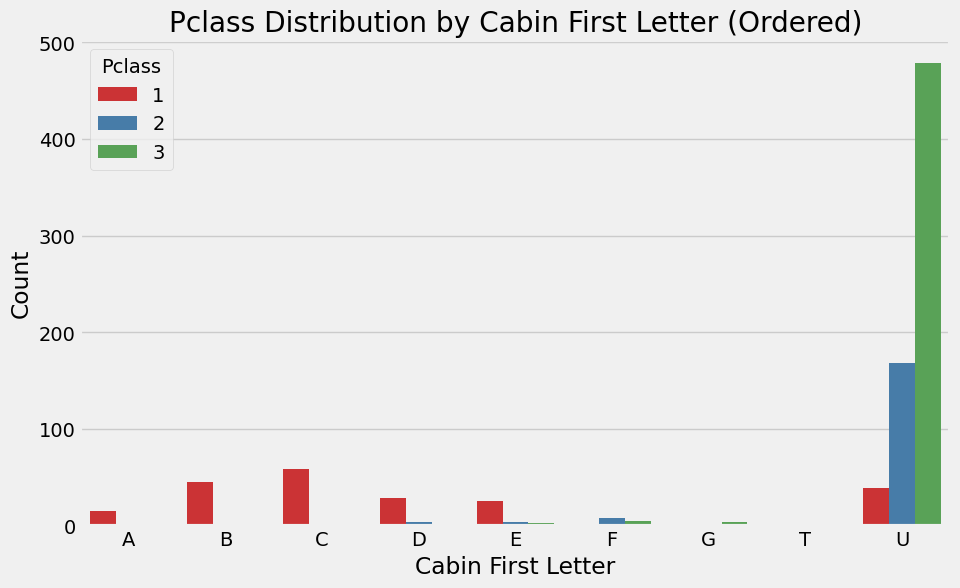

In [567]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Cabin_First_Letter'에 순서를 지정합니다. 예: 'A', 'B', 'C', 'D', 'E', ...
order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']

# 순서형 변수로 변환
train_df['Cabin_First_Letter'] = pd.Categorical(train_df['Cabin_First_Letter'], categories=order, ordered=True)

# 'Cabin_First_Letter'를 기준으로 정렬된 countplot 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Cabin_First_Letter', hue='Pclass', palette='Set1', order=order)

# 제목과 레이블 추가
plt.title("Pclass Distribution by Cabin First Letter (Ordered)")
plt.xlabel("Cabin First Letter")
plt.ylabel("Count")

In [568]:
survival_rate = train_df.groupby(['Sex'])['Survived'].mean()
survival_rate

,Survived
Sex,
female,0.741214
male,0.186087


In [569]:
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']

male_pos = np.random.uniform(0, male_rate, len(train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1)]))
male_neg = np.random.uniform(male_rate, 1, len(train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 0)]))
female_pos = np.random.uniform(0, female_rate, len(train_df[(train_df['Sex'] == 'female') & (train_df['Survived'] == 1)]))
female_neg = np.random.uniform(female_rate, 1, len(train_df[(train_df['Sex'] == 'female') & (train_df['Survived'] == 0)]))

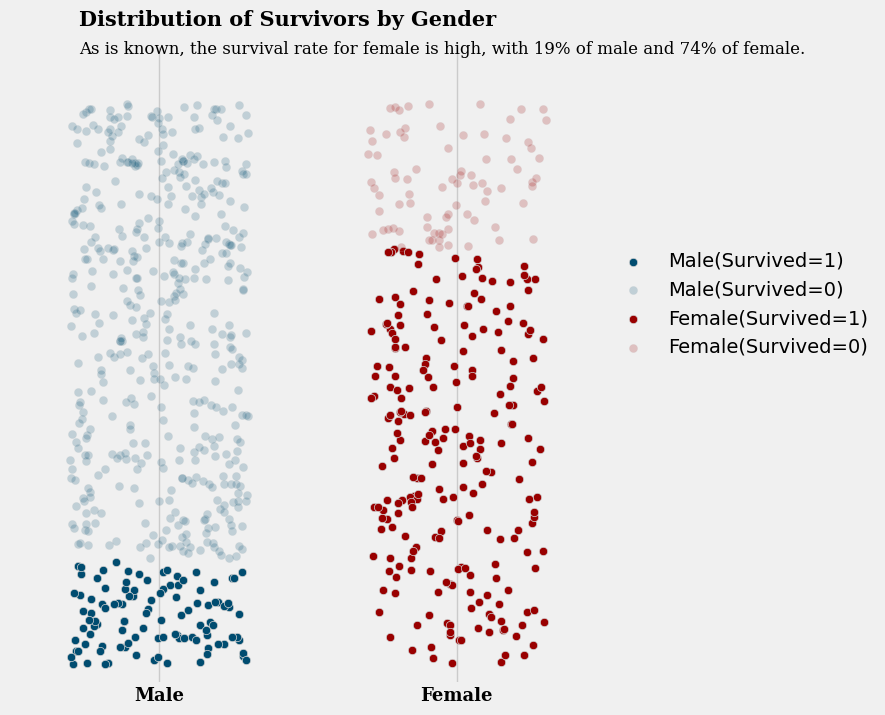

In [570]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(42)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male(Survived=1)')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male(Survived=0)')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female(Survived=1)')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female(Survived=0)')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top", "right", "left", 'bottom']:
    ax.spines[s].set_visible(False)

# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='serif', fontsize=15)
fig.text(0.1, 0.96, 'As is known, the survival rate for female is high, with 19% of male and 74% of female.', fontweight='light', fontfamily='serif', fontsize=12)

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()


성별은 유의해보이므로 검정해도 좋아보임.

# 검정

In [571]:
# 카이제곱 검정 : 범주형 변수와 이진 변수 간의 독립성 테스트
from scipy.stats import chi2_contingency

Embarked_Survived = pd.crosstab(train_df['Survived'], train_df['Embarked'])

chi2, p, dof, expected = chi2_contingency(Embarked_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")
#chi-square이 클수록 독립성이 낮아져, 두 변수 간 유의미한 관계가 있을 가능성이 높아짐
#p-value 0.05 이하일 때 통계적으로 유의미하다는 결론

Chi-square: 23.755398211655933, p-value: 6.943538064225584e-06


In [572]:
Sex_Survived = pd.crosstab(train_df['Sex'], train_df['Survived'])

chi2, p, dof, expected = chi2_contingency(Sex_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")

Chi-square: 262.28250014655595, p-value: 5.457500875296423e-59


두 값으로 미루어볼 때, Sex와 Survived 간의 강한 상관관계를 확인할 수 있음.

In [573]:
Pclass_Survived = pd.crosstab(train_df['Pclass'], train_df['Survived'])

chi2, p, dof, expected = chi2_contingency(Pclass_Survived)
print(f"Chi-square: {chi2}, p-value: {p}")
#Pclass의 값이 생존 확률에 영향을 미친다.

Chi-square: 100.02781293542104, p-value: 1.9021133892748734e-22


In [574]:
# 점-이분 상관계수 (One scale naturally dichotomous(nominal), one scale interval or ratio)
from scipy.stats import pointbiserialr

corr, p_value = pointbiserialr(train_df['Survived'], train_df['Age'])
print(f"Point-Biserial Correlation: {corr:.2f}")
print(f"p-value: {p_value:.4f}")
#거의 관계가 없으며, 유의하지 않다고 결과가 나왔습니다.

Point-Biserial Correlation: -0.06
p-value: 0.0658


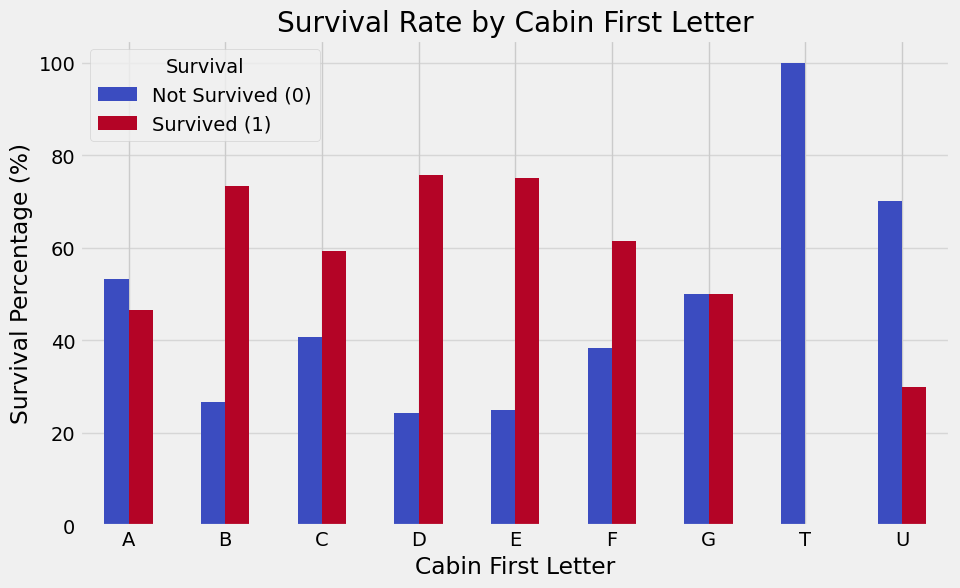

In [575]:
# 비율(%) 계산
survival_ratios = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100

# 그래프 그리기
survival_ratios.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')

plt.xlabel("Cabin First Letter")
plt.ylabel("Survival Percentage (%)")
plt.title("Survival Rate by Cabin First Letter")
plt.legend(["Not Survived (0)", "Survived (1)"], title="Survival")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.show()

# Pclass가 생존율에 미치는 영향
## H0:Pclass는 Survived에 영향을 미치지 않는다.
## H1:Pclass는 Survived에 영향을 미친다.


In [576]:
import scipy.stats as stats

# 'Pclass'와 'Survived' 교차표 만들기
contingency_table = pd.crosstab(train_df['Pclass'], train_df['Survived'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# p-value가 0.05보다 작은 경우, H0를 기각합니다.
if p < 0.05:
    print("p-value가 0.05보다 작으므로 H0를 기각하고, H1을 채택합니다. 즉, Pclass는 Survived에 영향을 미칩니다.")
else:
    print("p-value가 0.05보다 크므로 H0를 채택합니다. 즉, Pclass는 Survived에 영향을 미치지 않습니다.")

Chi-squared Statistic: 100.02781293542104
P-value: 1.9021133892748734e-22
Degrees of freedom: 2
Expected frequencies:
[[131.68581081  81.31418919]
 [113.75675676  70.24324324]
 [303.55743243 187.44256757]]
p-value가 0.05보다 작으므로 H0를 기각하고, H1을 채택합니다. 즉, Pclass는 Survived에 영향을 미칩니다.


# Cabin_first_letter가 생존율에 미치는 영향
## H0:Cabin_first_letter는 Survived에 영향을 미치지 않는다.
## H1:Cabin_first_letter는 Survived에 영향을 미친다.

In [577]:
import scipy.stats as stats

# 'Pclass'와 'Survived' 교차표 만들기
contingency_table = pd.crosstab(train_df['Cabin_First_Letter'], train_df['Survived'])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# p-value가 0.05보다 작은 경우, H0를 기각합니다.
if p < 0.05:
    print("p-value가 0.05보다 작으므로 H0를 기각하고, H1을 채택합니다. 즉, Cabin_First_Letter는 Survived에 영향을 미칩니다.")
else:
    print("p-value가 0.05보다 크므로 H0를 채택합니다. 즉, Cabin_First_Letter는 Survived에 영향을 미치지 않습니다.")

Chi-squared Statistic: 97.18406970063418
P-value: 1.6046062831389453e-17
Degrees of freedom: 8
Expected frequencies:
[[9.27364865e+00 5.72635135e+00]
 [2.78209459e+01 1.71790541e+01]
 [3.64763514e+01 2.25236486e+01]
 [2.04020270e+01 1.25979730e+01]
 [1.97837838e+01 1.22162162e+01]
 [8.03716216e+00 4.96283784e+00]
 [2.47297297e+00 1.52702703e+00]
 [6.18243243e-01 3.81756757e-01]
 [4.24114865e+02 2.61885135e+02]]
p-value가 0.05보다 작으므로 H0를 기각하고, H1을 채택합니다. 즉, Cabin_First_Letter는 Survived에 영향을 미칩니다.


# 이상치 처리

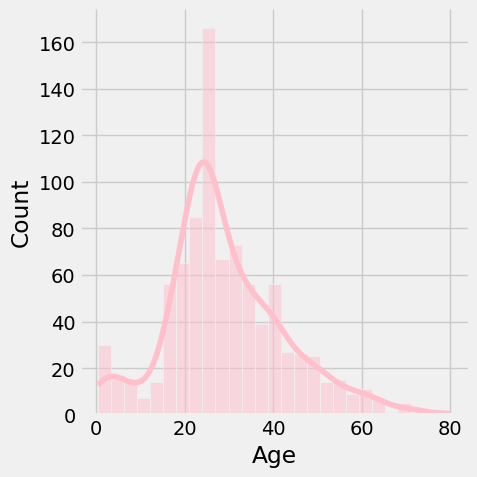

In [578]:
sns.displot(train_df['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

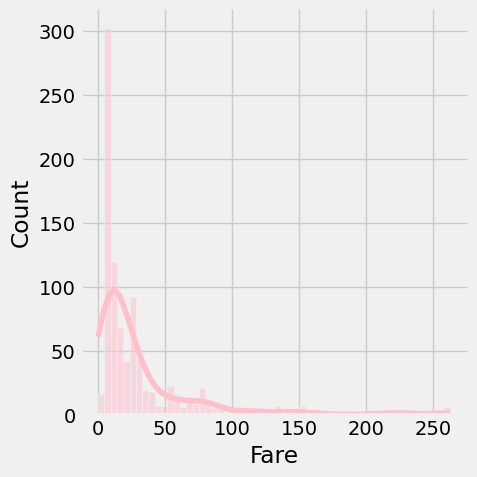

In [579]:
sns.displot(train_df['Fare'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

너무 치우쳐져 있음..

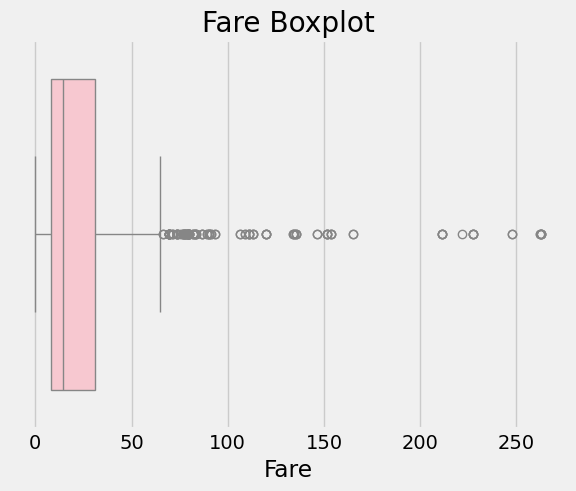

In [580]:
# IQR을 이용한 이상치 탐지
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(train_df, 'Fare')

sns.boxplot(x=train_df['Fare'], color='pink')
plt.title('Fare Boxplot')
plt.show()

#이상치 탐지

age는 정규분포에 가까움으로 z-score로 탐지함.

In [581]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(train_df['Age'])

abs_z_scores = np.abs(z_scores)
age_threshold = 3
age_outliers = train_df[abs_z_scores > age_threshold]

print("Age 이상치 (Z-score 기준):")
print(age_outliers)

Age 이상치 (Z-score 기준):
     PassengerId  Survived  Pclass                                  Name  \
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  \
96   male  71.0      0      0    PC 17754  34.6542    A5        C   
116  male  70.5      0      0      370369   7.7500     U        Q   
493  male  71.0      0      0    PC 17609  49.5042     U        C   
630  male  80.0      0      0       27042  30.0000   A23        S   
672  male  70.0      0  

In [582]:
z_scores = stats.zscore(test_df['Age'])

abs_z_scores = np.abs(z_scores)
age_threshold = 3
age_outliers = test_df[abs_z_scores > age_threshold]

print("Age 이상치 (Z-score 기준):")
print(age_outliers)

Age 이상치 (Z-score 기준):
     PassengerId  Survived  Pclass                                  Name  \
96            97         0       1             Goldschmidt, Mr. George B   
116          117         0       3                  Connors, Mr. Patrick   
493          494         0       1               Artagaveytia, Mr. Ramon   
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   
672          673         0       2           Mitchell, Mr. Henry Michael   
745          746         0       1          Crosby, Capt. Edward Gifford   
851          852         0       3                   Svensson, Mr. Johan   

      Sex   Age  SibSp  Parch      Ticket     Fare Cabin Embarked  \
96   male  71.0      0      0    PC 17754  34.6542    A5        C   
116  male  70.5      0      0      370369   7.7500     U        Q   
493  male  71.0      0      0    PC 17609  49.5042     U        C   
630  male  80.0      0      0       27042  30.0000   A23        S   
672  male  70.0      0  

In [583]:
train_df = train_df[abs_z_scores <= age_threshold]

In [584]:
test_df = train_df[abs_z_scores <= age_threshold]

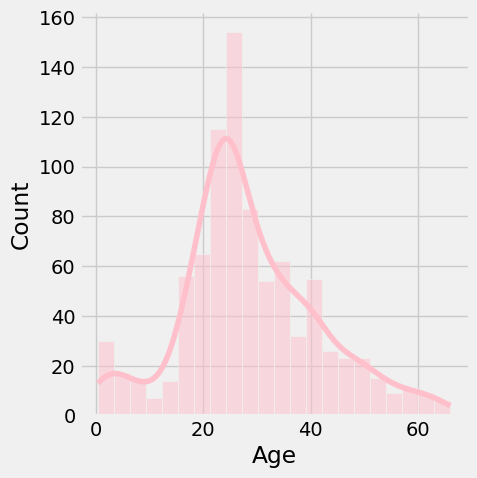

In [585]:
#이상치 처리 후 모습
sns.displot(train_df['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

비정규분포를 가지고 극단적 이상치가 많은 Fare 칼럼에서는 IQR으로 이상치를 판별하고 처리함.

In [586]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_lower_bound = Q1 - 1.5 * IQR
fare_upper_bound = Q3 + 1.5 * IQR

fare_outliers = train_df[(train_df['Fare'] < fare_lower_bound) | (train_df['Fare'] > fare_upper_bound)]

print("\nFare 이상치 (IQR 기준):")
print(fare_outliers)

train_df = train_df[(train_df['Fare'] >= fare_lower_bound) & (train_df['Fare'] <= fare_upper_bound)]



Fare 이상치 (IQR 기준):
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  35.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                               

In [587]:
Q1 = test_df['Fare'].quantile(0.25)
Q3 = test_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_lower_bound = Q1 - 1.5 * IQR
fare_upper_bound = Q3 + 1.5 * IQR

fare_outliers = test_df[(test_df['Fare'] < fare_lower_bound) | (test_df['Fare'] > fare_upper_bound)]

print("\nFare 이상치 (IQR 기준):")
print(fare_outliers)

test_df = test_df[(test_df['Fare'] >= fare_lower_bound) & (test_df['Fare'] <= fare_upper_bound)]


Fare 이상치 (IQR 기준):
     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  35.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                               

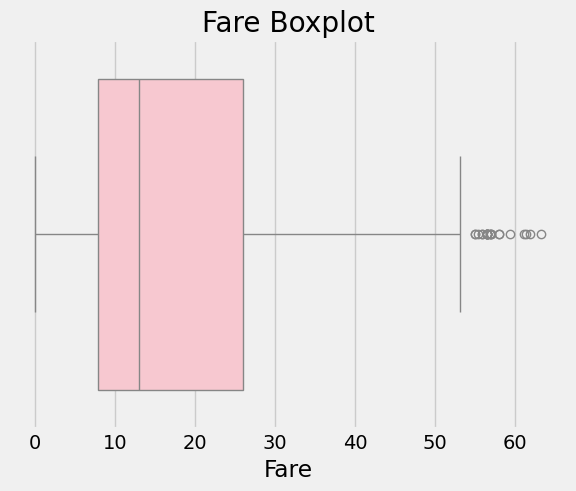

In [588]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_fare = detect_outliers_iqr(train_df, 'Fare')

sns.boxplot(x=train_df['Fare'], color='pink')
plt.title('Fare Boxplot')

plt.show()

In [589]:
train_df["log_fare"] = np.log1p(train_df["Fare"])  # log(1 + fare)
test_df["log_fare"] = np.log1p(test_df["Fare"])

In [590]:
from scipy.stats import boxcox

train_df["fare_boxcox"], lambda_ = boxcox(train_df["Fare"] + 1)  # 0 방지를 위해 +1
test_df["fare_boxcox"], lambda_ = boxcox(test_df["Fare"] + 1)  # 0 방지를 위해 +1

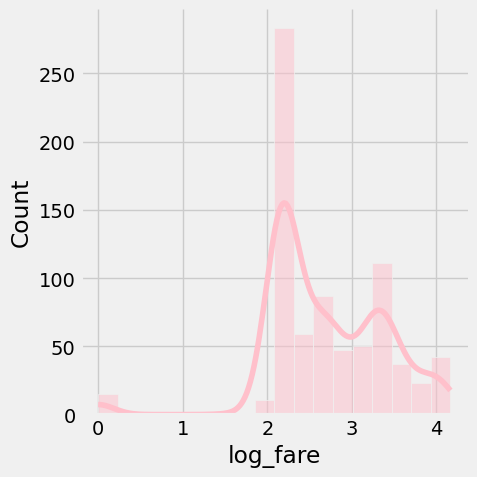

In [591]:
sns.displot(train_df['log_fare'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

# 스케일링

In [592]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767 entries, 0 to 890
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         767 non-null    int64   
 1   Survived            767 non-null    int64   
 2   Pclass              767 non-null    int64   
 3   Name                767 non-null    object  
 4   Sex                 767 non-null    object  
 5   Age                 767 non-null    float64 
 6   SibSp               767 non-null    int64   
 7   Parch               767 non-null    int64   
 8   Ticket              767 non-null    object  
 9   Fare                767 non-null    float64 
 10  Cabin               767 non-null    object  
 11  Embarked            767 non-null    object  
 12  Cabin_First_Letter  767 non-null    category
 13  FamilySize          767 non-null    int64   
 14  age_band            767 non-null    object  
 15  log_fare            767 non-null    float64 


In [593]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 훈련 데이터와 테스트 데이터를 스케일링
input_scaled_train = train_df.copy()

# 연속형 변수만 스케일링
input_scaled_train[['Age', 'Fare']] = scaler.fit_transform(input_scaled_train[['Age', 'Fare']])

In [594]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 훈련 데이터와 테스트 데이터를 스케일링
input_scaled_test = test_df.copy()

# 연속형 변수만 스케일링
input_scaled_test[['Age', 'Fare']] = scaler.fit_transform(input_scaled_test[['Age', 'Fare']])

# 인코딩

In [595]:
input_processed_train = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'age_band', 'Fare', 'fare_boxcox'])

In [596]:
# 범주형 변수를 원-핫 인코딩
input_processed_train = pd.get_dummies(input_processed_train, columns=['Sex'], drop_first=True) #Change train_df to input_scaled_train
input_processed_train

,Survived,Pclass,Age,SibSp,Parch,Embarked,Cabin_First_Letter,FamilySize,log_fare,Sex_male
0,0,3,22.0,1,0,S,U,2,2.110213,True
2,1,3,26.0,0,0,S,U,1,2.188856,False
3,1,1,35.0,1,0,S,C,2,3.990834,False
4,0,3,35.0,0,0,S,U,1,2.202765,True
5,0,3,25.0,0,0,Q,U,1,2.246893,True
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,S,U,1,2.639057,True
887,1,1,19.0,0,0,S,B,1,3.433987,False
888,0,3,21.5,1,2,S,U,4,3.196630,False
889,1,1,26.0,0,0,C,C,1,3.433987,True


In [597]:
input_processed_train['Embarked'] = input_processed_train['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

In [598]:
from sklearn.preprocessing import LabelEncoder

cabin_encoder = LabelEncoder()
input_processed_train['Cabin_First_Letter'] = cabin_encoder.fit_transform(input_processed_train['Cabin_First_Letter'])

In [599]:
input_processed_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'age_band', 'Fare', 'fare_boxcox'])
input_processed_test = pd.get_dummies(input_processed_test, columns=['Sex'], drop_first=True)

# Embarked와 Cabin_First_Letter 인코딩
input_processed_test['Embarked'] = input_processed_test['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

# test의 Cabin_First_Letter 인코딩
input_processed_test['Cabin_First_Letter'] = cabin_encoder.transform(input_processed_test['Cabin_First_Letter'])

# 타겟 변수를 제외한 features만 사용
X_train = input_processed_train.drop('Survived', axis=1)
y_train = input_processed_train['Survived']
X_test = input_processed_test.drop('Survived', axis=1)
y_test = input_processed_test['Survived']

# 동일한 feature 수를 갖도록 보장
assert X_train.shape[1] == X_test.shape[1], "Feature mismatch between train and test datasets"

# Train-Test Split (train_df는 이미 전처리 후)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(536, 9)
(231, 9)


# 모델 활용

In [600]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 랜덤 포레스트 모델 초기화
model = RandomForestClassifier(random_state=42, n_estimators=100)

# 모델 학습
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [601]:
# 테스트 세트로 예측 수행
y_pred = model.predict(X_test)

# 정확도(Accuracy) 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# 분류 보고서(Classification Report) 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬(Confusion Matrix) 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8268

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       158
           1       0.76      0.66      0.71        73

    accuracy                           0.83       231
   macro avg       0.81      0.78      0.79       231
weighted avg       0.82      0.83      0.82       231


Confusion Matrix:
[[143  15]
 [ 25  48]]


In [602]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train_df[['Fare', 'log_fare']]

# 상수항 추가 (VIF 계산을 위해)
X = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,37.776586
1,Fare,5.163472
2,log_fare,5.163472


In [603]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train_df[['Fare', 'fare_boxcox']]

# 상수항 추가 (VIF 계산을 위해)
X = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,33.890796
1,Fare,8.193156
2,fare_boxcox,8.193156


In [604]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = train_df[['fare_boxcox', 'log_fare']]

# 상수항 추가 (VIF 계산을 위해)
X = add_constant(X)

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,46.497422
1,fare_boxcox,91.677073
2,log_fare,91.677073


In [605]:
train_df[['Fare', 'log_fare', 'fare_boxcox']].corr()

,Fare,log_fare,fare_boxcox
Fare,1.000000,0.897960,0.936988
log_fare,0.897960,1.000000,0.994531
fare_boxcox,0.936988,0.994531,1.000000


In [606]:
train_df = train_df.drop(columns=['Fare', 'fare_boxcox'])
test_df = test_df.drop(columns=['Fare', 'fare_boxcox'])

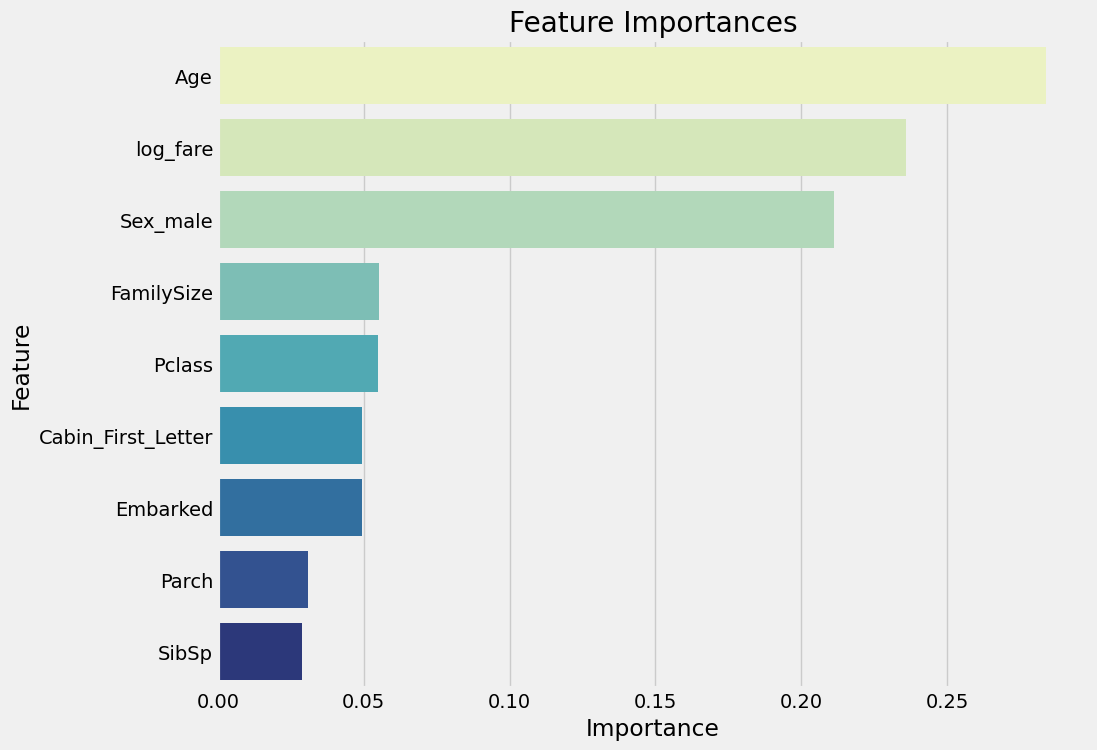

In [607]:
# 특징 중요도 추출
feature_importances = model.feature_importances_
features = X_train.columns

# 중요도 시각화
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# 중요도 순서로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='YlGnBu')
plt.title('Feature Importances')
plt.show()

# 예측

In [608]:
#피쳐 선택
test1 = test_df[['Age', 'log_fare', 'Sex', 'FamilySize', 'Cabin_First_Letter', 'Pclass', 'Embarked']]

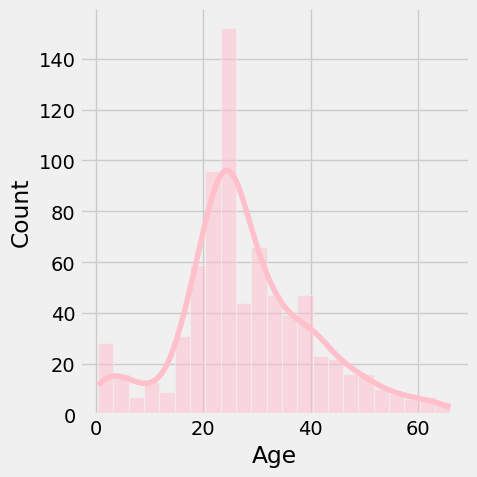

In [609]:
sns.displot(test1['Age'], kde=True, color='pink') #핑크색 예쁘죵
plt.show()

##스케일링

In [610]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 연속형 변수만 스케일링
test1[['Age', 'log_fare']] = scaler.fit_transform(test1[['Age', 'log_fare']])

In [611]:
test1 = pd.get_dummies(test1, columns=['Sex'], drop_first=True)
test1

,Age,log_fare,FamilySize,Cabin_First_Letter,Pclass,Embarked,Sex_male
0,0.329064,0.506719,2,U,3,S,True
2,0.390058,0.525603,1,U,3,S,False
3,0.527295,0.958306,2,C,1,S,False
4,0.527295,0.528943,1,U,3,S,True
5,0.374809,0.539539,1,U,3,Q,True
...,...,...,...,...,...,...,...
886,0.405306,0.633708,1,U,2,S,True
887,0.283318,0.824592,1,B,1,S,False
888,0.321439,0.767597,4,U,3,S,False
889,0.390058,0.824592,1,C,1,C,True


In [612]:
test1['Embarked'] = test1['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

In [613]:
from sklearn.preprocessing import LabelEncoder

cabin_encoder = LabelEncoder()
test1['Cabin_First_Letter'] = cabin_encoder.fit_transform(test1['Cabin_First_Letter'])

In [614]:
test1 = test1.reindex(columns=X_train.columns, fill_value=0)

# 2. 모델을 사용하여 예측
y_pred_test = model.predict(test1)

# 3. 예측 결과를 test 데이터프레임에 추가
test1['Survived'] = y_pred_test

# 예측된 survived 값을 확인
print(test1[['Survived']])

     Survived
0           0
2           1
3           1
4           0
5           0
..        ...
886         0
887         1
888         1
889         1
890         0

[767 rows x 1 columns]


In [615]:
test1['Survived'].value_counts()

,count
Survived,
0,494
1,273


#다른 모델

### GBDT

In [616]:
print(X_train.shape)
print(y_train.shape)

print(X_test.isnull().sum())
print(y_test.isnull().sum())

(536, 9)
(536,)
Pclass                0
Age                   0
SibSp                 0
Parch                 0
Embarked              0
Cabin_First_Letter    0
FamilySize            0
log_fare              0
Sex_male              0
dtype: int64
0


In [617]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Gradient Boosting 모델 초기화
gb_model = GradientBoostingClassifier(random_state=42)

# 모델 학습
gb_model.fit(X_train, y_train)

# 예측
y_pred_gb = gb_model.predict(X_test)

# 정확도 출력
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")

Gradient Boosting Accuracy: 0.8311688311688312


### XGBoost

In [618]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# XGBoost 모델 초기화
xgb_model = xgb.XGBClassifier(random_state=42)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

# 정확도 출력
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")


XGBoost Accuracy: 0.8181818181818182


## LightGBM

In [619]:
# !pip install optuna

# warnings.filterwarnings('ignore', category=UserWarning, module='LightGBM')

# import optuna
# from lightgbm import LGBMClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.datasets import load_breast_cancer

# 데이터 준비
# data = load_breast_cancer()
# X = data.data
# y = data.target
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Optuna 목적 함수 정의
# def objective(trial):
    # 하이퍼파라미터 정의
    # param = {
    #     'num_leaves': trial.suggest_int('num_leaves', 20, 200),
    #     'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
    #     'n_estimators': trial.suggest_int('n_estimators', 50, 500),
    #     'max_depth': trial.suggest_int('max_depth', 3, 12)
    # }

    # 모델 학습
    # model = LGBMClassifier(**param)
    # model.fit(X_train, y_train)
    # score = model.score(X_valid, y_valid)
    # return score

# Optuna로 하이퍼파라미터 튜닝
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=50)

# print(f"Best trial: {study.best_trial.value}")
# print(f"Best params: {study.best_trial.params}")


In [620]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# train 데이터 전처리
input_processed_train = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'age_band'])
input_processed_train = pd.get_dummies(input_processed_train, columns=['Sex'], drop_first=True)

# Embarked와 Cabin_First_Letter 인코딩
input_processed_train['Embarked'] = input_processed_train['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

cabin_encoder = LabelEncoder()
input_processed_train['Cabin_First_Letter'] = cabin_encoder.fit_transform(input_processed_train['Cabin_First_Letter'])

# test 데이터 전처리
input_processed_test = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'age_band'])
input_processed_test = pd.get_dummies(input_processed_test, columns=['Sex'], drop_first=True)

# Embarked와 Cabin_First_Letter 인코딩
input_processed_test['Embarked'] = input_processed_test['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

# test의 Cabin_First_Letter 인코딩 (train에서 학습한 label encoder 사용)
input_processed_test['Cabin_First_Letter'] = cabin_encoder.transform(input_processed_test['Cabin_First_Letter'])

# train과 test의 컬럼 일치시키기: train에 없는 test 컬럼을 추가하고, 그 반대도 마찬가지
input_processed_train, input_processed_test = input_processed_train.align(input_processed_test, join='outer', axis=1, fill_value=0)

# 타겟 변수를 제외한 features만 사용
X_train = input_processed_train.drop('Survived', axis=1)
y_train = input_processed_train['Survived']
X_test = input_processed_test.drop('Survived', axis=1)
y_test = input_processed_test['Survived']

# Train-Test Split (train_df는 이미 전처리 후)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# X_train과 X_test 컬럼 일치시키기 (같지 않으면 0으로 채움)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [621]:
# LightGBM 모델 초기화 (기본 파라미터 사용)
lgb_model = lgb.LGBMClassifier(random_state=42)

# 모델 학습
lgb_model.fit(X_train, y_train)

# 예측
y_pred_lgb = lgb_model.predict(X_test)

# 정확도 계산
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb}")

[LightGBM] [Info] Number of positive: 187, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348881 -> initscore=-0.623963
[LightGBM] [Info] Start training from score -0.623963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## 예측

In [622]:
#피쳐 선택
test2 = test_df[['Age', 'log_fare', 'Sex', 'FamilySize', 'Cabin_First_Letter', 'Pclass', 'Embarked']]

In [623]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 연속형 변수만 스케일링
test2[['Age', 'log_fare']] = scaler.fit_transform(test2[['Age', 'log_fare']])

# Sex 변수에 대해 원핫 인코딩
test2 = pd.get_dummies(test2, columns=['Sex'], drop_first=True)

# Embarked 변수 인코딩
test2['Embarked'] = test2['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

# Cabin_First_Letter 변수 인코딩
cabin_encoder = LabelEncoder()
test2['Cabin_First_Letter'] = cabin_encoder.fit_transform(test2['Cabin_First_Letter'])

# train과 test2의 컬럼 일치시키기
test2 = test2.reindex(columns=X_train.columns, fill_value=0)

# 모델을 사용하여 예측
y_pred_test = model.predict(test2)

# 예측 결과를 test2 데이터프레임에 추가
test2['Survived'] = y_pred_test

# 예측된 survived 값을 확인
print(test2[['Survived']])

# test2 데이터에서 Survived 값의 분포 확인
print(test2['Survived'].value_counts())


     Survived
0           0
2           1
3           1
4           0
5           0
..        ...
886         0
887         1
888         1
889         1
890         0

[767 rows x 1 columns]
Survived
0    494
1    273
Name: count, dtype: int64


# 데이터 증강 SMOTE LightGBM test3

In [624]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [625]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# train 데이터 전처리
input_processed_train_smote = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'age_band'])
input_processed_train_smote = pd.get_dummies(input_processed_train_smote, columns=['Sex'], drop_first=True)

# Embarked와 Cabin_First_Letter 인코딩
input_processed_train_smote['Embarked'] = input_processed_train_smote['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

cabin_encoder = LabelEncoder()
input_processed_train_smote['Cabin_First_Letter'] = cabin_encoder.fit_transform(input_processed_train_smote['Cabin_First_Letter'])

# test 데이터 전처리
input_processed_test_smote = test_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'age_band'])
input_processed_test_smote = pd.get_dummies(input_processed_test_smote, columns=['Sex'], drop_first=True)

# Embarked와 Cabin_First_Letter 인코딩
input_processed_test_smote['Embarked'] = input_processed_test_smote['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

# test의 Cabin_First_Letter 인코딩 (train에서 학습한 label encoder 사용)
input_processed_test_smote['Cabin_First_Letter'] = cabin_encoder.transform(input_processed_test_smote['Cabin_First_Letter'])

# train과 test의 컬럼 일치시키기: train에 없는 test 컬럼을 추가하고, 그 반대도 마찬가지
input_processed_train_smote, input_processed_test_smote = input_processed_train_smote.align(input_processed_test_smote, join='outer', axis=1, fill_value=0)

# 타겟 변수를 제외한 features만 사용
X_train_smote = input_processed_train_smote.drop('Survived', axis=1)
y_train_smote = input_processed_train_smote['Survived']
X_test_smote = input_processed_test_smote.drop('Survived', axis=1)
y_test_smote = input_processed_test_smote['Survived']

# Train-Test Split (train_df는 이미 전처리 후)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=42)

# X_train과 X_test 컬럼 일치시키기 (같지 않으면 0으로 채움)
X_test_smote = X_test_smote.reindex(columns=X_train_smote.columns, fill_value=0)

In [626]:
# LightGBM 모델 초기화 (기본 파라미터 사용)
lgb_model_smote = lgb.LGBMClassifier(random_state=42)

# 모델 학습
lgb_model_smote.fit(X_train, y_train)

# 예측
y_pred_lgb = lgb_model_smote.predict(X_test)

# 정확도 계산
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb}")

[LightGBM] [Info] Number of positive: 187, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348881 -> initscore=-0.623963
[LightGBM] [Info] Start training from score -0.623963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## 예측

In [627]:
#피쳐 선택
test3 = test_df[['Age', 'log_fare', 'Sex', 'FamilySize', 'Cabin_First_Letter', 'Pclass', 'Embarked']]

In [628]:
from sklearn.preprocessing import MinMaxScaler

# 스케일러 초기화
scaler = MinMaxScaler()

# 연속형 변수만 스케일링
test3[['Age', 'log_fare']] = scaler.fit_transform(test3[['Age', 'log_fare']])

# Sex 변수에 대해 원핫 인코딩
test3 = pd.get_dummies(test3, columns=['Sex'], drop_first=True)

# Embarked 변수 인코딩
test3['Embarked'] = test3['Embarked'].map({'S': 2, 'C': 1, 'Q': 0})

# Cabin_First_Letter 변수 인코딩
cabin_encoder = LabelEncoder()
test3['Cabin_First_Letter'] = cabin_encoder.fit_transform(test3['Cabin_First_Letter'])

# train과 test3의 컬럼 일치시키기
test3 = test3.reindex(columns=X_train.columns, fill_value=0)

# 모델을 사용하여 예측
y_pred_test = model.predict(test3)

# 예측 결과를 test3 데이터프레임에 추가
test3['Survived'] = y_pred_test

# 예측된 survived 값을 확인
print(test3[['Survived']])

# test3 데이터에서 Survived 값의 분포 확인
print(test3['Survived'].value_counts())

     Survived
0           0
2           1
3           1
4           0
5           0
..        ...
886         0
887         1
888         1
889         1
890         0

[767 rows x 1 columns]
Survived
0    494
1    273
Name: count, dtype: int64


# 모델 저장

In [645]:
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

# 모델 학습 및 결과 저장 함수
def train_and_save_model(model, X_train, y_train, X_test, y_test, model_name, results):
    # 모델 학습
    model.fit(X_train, y_train)

    # 예측 및 정확도 계산
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # 특성 중요도 계산 (모델에 특성 중요도가 있는 경우)
    feature_importances = []
    if hasattr(model, 'feature_importances_'):
        feature_importances = list(zip(X_train.columns, model.feature_importances_))

    # 결과 저장
    results.append({
        'model': model_name,
        'score_tr': '',
        'score_te': '',
        'auc_te': accuracy,
        'len_features': len(X_train.columns),
        'feature_importances': feature_importances,
        'create_dt': datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    })

# 모델 리스트 정의
models = [
    ('RandomForest', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('LightGBM', lgb.LGBMClassifier(random_state=42))
]

# 결과를 저장할 리스트
args = {'results': []}

# LightGBM 모델 초기화 (기본 파라미터 사용)
lgb_model_smote = lgb.LGBMClassifier(random_state=42)

# 모델 학습
lgb_model_smote.fit(X_train, y_train)

# 예측
y_pred_lgb = lgb_model_smote.predict(X_test)

# 정확도 계산
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM_smote Accuracy: {accuracy_lgb}")

# 결과 저장
train_and_save_model(lgb_model_smote, X_train_smote, y_train_smote, X_test, y_test, 'LightGBM_SMOTE', args['results'])

# 나머지 모델 학습 및 결과 저장
for model_name, model in models:
    train_and_save_model(model, X_train, y_train, X_test, y_test, model_name, args['results'])

# 결과 출력
for result in args['results']:
    print(f"Model: {result['model']}, AUC: {result['auc_te']}, Date: {result['create_dt']}")

[LightGBM] [Info] Number of positive: 187, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348881 -> initscore=-0.623963
[LightGBM] [Info] Start training from score -0.623963
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [631]:
model_result_df = pd.DataFrame(args['results'])

In [632]:
# AUC 값을 기준으로 내림차순 정렬
sorted_results = model_result_df.sort_values(by='auc_te', ascending=False)

In [633]:
# 가장 높은 AUC를 가진 모델의 예측값 선택(lightGBM선택)
best_model = sorted_results.iloc[0]
best_model_predictions = best_model['feature_importances']

# submission1

In [634]:
submission1 = pd.concat([test_df[['PassengerId']], test1[['Survived']]], axis=1)

In [635]:
submission1.isnull().sum()

,0
PassengerId,0
Survived,0


In [636]:
import os
#휘발성이므로 런타임 해제될 시 확인 불가. 따라서 json/csv로 저장하는 것이 권장

today_results = pd.DataFrame(args['results'])

file_path = 'model_results.csv'

if os.path.exists(file_path):
    existing_results = pd.read_csv(file_path)
    combined_results = pd.concat([existing_results, today_results], ignore_index=True)
else:
    combined_results = today_results

combined_results.to_csv(file_path, index=False)

print(f"Results have been saved to {file_path}")

Results have been saved to model_results.csv


In [637]:
submission1['Survived'].value_counts()

,count
Survived,
0,494
1,273


In [638]:
train_df['Survived'].value_counts()

,count
Survived,
0,507
1,260


# Submission2

In [639]:
submission2 = pd.concat([test_df[['PassengerId']], test2[['Survived']]], axis=1)

In [640]:
submission2.isnull().sum()

,0
PassengerId,0
Survived,0


In [641]:
submission2['Survived'].value_counts()

,count
Survived,
0,494
1,273


# submission3

In [642]:
submission3 = pd.concat([test_df[['PassengerId']], test3[['Survived']]], axis=1)

In [643]:
submission3.isnull().sum()

,0
PassengerId,0
Survived,0


In [644]:
submission3['Survived'].value_counts()

,count
Survived,
0,494
1,273
